In [1]:
# import alle necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt 

In [13]:
# import the data and set the first column to the index-column
data = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv', thousands=r',',index_col=0)

# shape of the Dataframe
shape = data.shape
print(f'The Dataset has {data.shape[0]} rows and {data.shape[1]} columns') 

# display first five rows 
data.head()

The Dataset has 924 rows and 7 columns


,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [46]:
# check for nan-values in the whole dataframe
missing_values = data.isnull().sum().sum()
print('There are %s missing values in the Dataframe!' %(missing_values))
print()
      

# check for nan in all coloumns
cols = data.columns
print(cols)

for col in cols:
    temp = data[col].isnull().values.sum()
    print(f'Column {col} has {temp} missing values')

There are 0 missing values in the Dataframe!

Index(['Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat', 'PriceQm'], dtype='object')
Column Address has 0 missing values
Column Zip has 0 missing values
Column Price has 0 missing values
Column Area has 0 missing values
Column Room has 0 missing values
Column Lon has 0 missing values
Column Lat has 0 missing values
Column PriceQm has 0 missing values


In [21]:
# drop rows where at least on value is missing
data.dropna()

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [37]:
# add a new column 'PriceQm' which represents the price per squaremeter and round for two decimals
data['PriceQm'] = data.Price / data.Area
data['PriceQm'] = data['PriceQm'].round(2)


<AxesSubplot:xlabel='Room'>

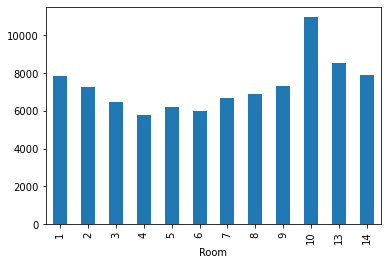

In [63]:
# see the 
bla = data.groupby('Room').PriceQm.mean()
bla.plot.bar()

<AxesSubplot:xlabel='Room'>

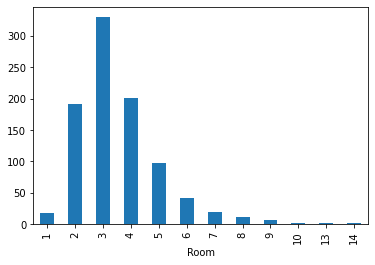

In [68]:
bla = data.groupby('Room').size()
bla.plot.bar()